In [1]:
true_x(t) = exp(-4*t)* (-64*exp(t) + 15*exp(8*t) + 49)/59
true_y(t) = exp(-4*t)*(160*exp(t) - 28*exp(2*t) + 15*exp(8*t) - 147) /112

true_y (generic function with 1 method)

In [2]:

function parametric_ode_system!(du,u,p,t)
  x, y = u
  a1, b1, c1, d1, a2, b2, c2, d2 = p
  du[1] = dx = a1*x + b1*y + c1*exp(-d1*t)
  du[2] = dy = a2*x + b2*y + c2*exp(-d2*t)
end

true_params = [2,4,1,-2, 3,-2,2,-3]

8-element Vector{Int64}:
  2
  4
  1
 -2
  3
 -2
  2
 -3

In [3]:
using Flux

In [4]:
using DiffEqFlux

In [5]:
using DifferentialEquations

In [6]:
using Plots

In [7]:
trange = 0.0:0.01:1.0   # Time range
u0 = [0.0,0.0]    # Initial values
tspan = (0.0,1.0)
p = ones(8)    # Initial guess of parameters

8-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [8]:
# The single ODE layer

prob = ODEProblem(parametric_ode_system!, u0, tspan, p)

function net()
    solve(prob, Tsit5(), p=p, saveat=trange)
end

net (generic function with 1 method)

In [9]:
dataset_outs = [true_x.(trange), true_y.(trange)]
function loss_func()
  pred = net()
  sum(abs2, dataset_outs[1] .- pred[1,:]) +
  sum(abs2, dataset_outs[2] .- pred[2,:])
end

loss_func (generic function with 1 method)

In [10]:
epochs = 1000
learning_rate = 0.05
data = Iterators.repeated((), epochs)
opt = ADAM(learning_rate)
callback_func = function ()
  # println("loss: ", loss_func())
end
fparams = Flux.params(p)
Flux.train!(loss_func, fparams, data, opt, cb=callback_func)



loss: 1639.9300066984488
loss: 1487.5642334095658
loss: 1328.9505445331874
loss: 1165.8778985122037
loss: 1000.9544898847414
loss: 837.8700138193689
loss: 681.6774785069206
loss: 539.0656078700366
loss: 418.4552314123649
loss: 329.4595132020084
loss: 280.6559293635054
loss: 274.2487525649109
loss: 299.35377811815124
loss: 333.4125439950459
loss: 354.60990747477325
loss: 351.38710300604714
loss: 323.3915139509163
loss: 277.95309381357185
loss: 225.41527448350584
loss: 175.27896397409793
loss: 134.01410008039406
loss: 104.47703016483374
loss: 86.43778795906157
loss: 77.64195351659541
loss: 74.93365586512522
loss: 75.14851931800784
loss: 75.6786059502078
loss: 74.72962255150446
loss: 71.3659198350708
loss: 65.42851046513023
loss: 57.387875466581086
loss: 48.16441022849379
loss: 38.92823250805239
loss: 30.881464702507913
loss: 25.029778109627436
loss: 21.969568678784658
loss: 21.72963677911727
loss: 23.734318198590216
loss: 26.93384118412304
loss: 30.096678003361486
loss: 32.17750818629608

loss: 0.29455318034147554
loss: 0.2939238105881571
loss: 0.2933104110647068
loss: 0.292712456790645
loss: 0.2921294403901585
loss: 0.291560870703139
loss: 0.291006273371313
loss: 0.2904651900290323
loss: 0.2899371766648246
loss: 0.28942180490743985
loss: 0.2889186608773076
loss: 0.2884273445801522
loss: 0.2879474691052799
loss: 0.2874786605194488
loss: 0.2870205582475539
loss: 0.28657281445614724
loss: 0.286135091676627
loss: 0.2857070647948379
loss: 0.28528842041976854
loss: 0.28487885527038315
loss: 0.28447807654062335
loss: 0.28408580150314855
loss: 0.2837017577935165
loss: 0.283325682240077
loss: 0.28295732011487956
loss: 0.28259642695199766
loss: 0.28224276512113416
loss: 0.28189610686198396
loss: 0.2815562314043753
loss: 0.2812229266713449
loss: 0.28089598703121704
loss: 0.2805752148864783
loss: 0.280260419094919
loss: 0.2799514150948372
loss: 0.2796480260636965
loss: 0.2793500797356593
loss: 0.2790574112638202
loss: 0.2787698613626662
loss: 0.27848727615356134
loss: 0.2782095069

loss: 0.25079412723688516
loss: 0.2507527627751883
loss: 0.2507114418473253
loss: 0.2506701636010492
loss: 0.25062892676944476
loss: 0.25058773092852926
loss: 0.25054657471284675
loss: 0.25050545721183887
loss: 0.25046437825002305
loss: 0.25042333600131894
loss: 0.25038233019669603
loss: 0.2503413594085526
loss: 0.2503004232773759
loss: 0.25025952068697255
loss: 0.2502186506693853
loss: 0.250177812962448
loss: 0.250137005984255
loss: 0.2500962295975843
loss: 0.25005548244970904
loss: 0.2500147639481301
loss: 0.2499740734649595
loss: 0.24993341033180716
loss: 0.24989277314417077
loss: 0.24985216193087617
loss: 0.24981157562964107
loss: 0.249771013199922
loss: 0.24973047425938955
loss: 0.24968995811679787
loss: 0.2496494639206302
loss: 0.24960899106802908
loss: 0.24956853883728553
loss: 0.2495281064463265
loss: 0.24948769344659283
loss: 0.24944729886754569
loss: 0.24940692229131348
loss: 0.24936656332412183
loss: 0.24932622062454152
loss: 0.24928589413838687
loss: 0.24924558312449888
los

In [11]:
predict_prob = ODEProblem(parametric_ode_system!, u0, tspan, p)
predict_sol = solve(prob, Tsit5(), saveat=trange)
x_predict_sol = [u[1] for u in predict_sol.u]
y_predict_sol = [u[2] for u in predict_sol.u]

println("Learned parameters:", p)

Learned parameters:[2.6799130382655405, 2.339131275510829, 1.042759464060486, 0.410887752830368, 1.3796691793688731, 1.188526813610638, 1.0136118465057407, 1.100436326640653]


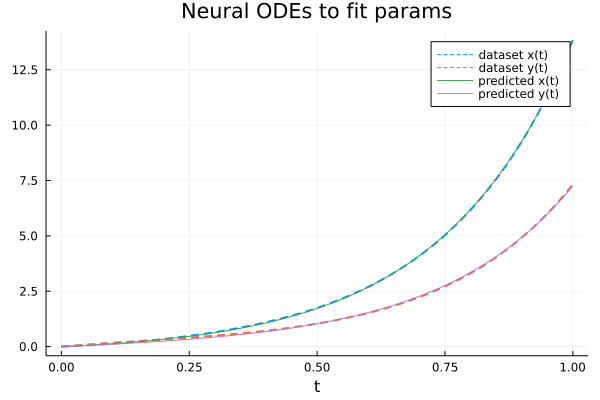

In [13]:
plot(trange, dataset_outs[1],
    linewidth=2, ls=:dash,
    title="Neural ODEs to fit params",
    xaxis="t",
    label="dataset x(t)",
    legend=true)
plot!(trange, dataset_outs[2],
    linewidth=2, ls=:dash,
    label="dataset y(t)")
plot!(predict_sol.t, x_predict_sol,
    linewidth=1,
    label="predicted x(t)")
plot!(predict_sol.t, y_predict_sol,
    linewidth=1,
    label="predicted y(t)")